# **VAE From Scratch**
In this notebook you will implement VAE from scratch and train it using the MNIST dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
BATCH_SIZE = 128
LATENT_DIM = 10
LR = 1e-3
EPOCHS = # Choose the appropriate value
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Preparing the dataset

In [ ]:
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 486kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.44MB/s]


# Encoder Module

In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc_mu = nn.Linear(400, latent_dim)
        self.fc_logvar = nn.Linear(400, latent_dim)

    def forward(self, x):
        # TODO:
        # 1. Flatten input images into vectors
        # 2. Pass through fc1 and apply ReLU
        # 3. Compute mean vector mu using fc_mu
        # 4. Compute log-variance vector logvar using fc_logvar
        # 5. Return mu, logvar
        pass


# Reparameterization Module

In [ ]:
def reparameterize(mu, logvar):
    # TODO:
    # 1. Compute standard deviation from log-variance
    # 2. Sample epsilon from N(0, I) with same shape
    # 3. Generate latent vector using reparameterization trick
    pass

# Decoder Module

In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.fc1 = nn.Linear(latent_dim, 400)
        self.fc2 = nn.Linear(400, 784)

    def forward(self, z):
        # TODO:
        # 1. Pass latent vector through fc1 + ReLU
        # 2. Pass through fc2 + Sigmoid
        # 3. Reshape output to image format (B,1,28,28)
        pass

# VAE Wrapper

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def forward(self, x):
        # TODO:
        # 1. Encode input to get mu and logvar
        # 2. Sample latent vector using reparameterize
        # 3. Decode z to reconstructed image
        # 4. Return x_hat, mu, logvar
        pass


# VAE Loss

In [ ]:
def vae_loss(x, x_hat, mu, logvar):
    # TODO:
    # 1. Compute binary cross-entropy reconstruction loss (sum)
    # 2. Compute KL divergence term
    # 3. Return total loss, recon loss, KL loss
    pass

# Train

In [ ]:
model = VAE(LATENT_DIM).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

model.train()
for epoch in range(1, EPOCHS + 1):
    total_loss = 0
    total_recon = 0
    total_kl = 0

    for x, _ in train_loader:
        x = x.to(DEVICE)

        x_hat, mu, logvar = model(x)
        loss, recon, kl = vae_loss(x, x_hat, mu, logvar)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_recon += recon.item()
        total_kl += kl.item()

    print(
        f"Epoch {epoch:02d} | "
        f"Loss: {total_loss / len(train_dataset):.2f} | "
        f"Recon: {total_recon / len(train_dataset):.2f} | "
        f"KL: {total_kl / len(train_dataset):.2f}"
    )


Epoch 01 | Loss: 163.01 | Recon: 149.38 | KL: 13.63
Epoch 02 | Loss: 124.91 | Recon: 108.40 | KL: 16.51
Epoch 03 | Loss: 119.60 | Recon: 102.64 | KL: 16.96
Epoch 04 | Loss: 116.82 | Recon: 99.52 | KL: 17.30
Epoch 05 | Loss: 115.07 | Recon: 97.49 | KL: 17.58
Epoch 06 | Loss: 113.77 | Recon: 96.01 | KL: 17.76
Epoch 07 | Loss: 112.82 | Recon: 94.92 | KL: 17.89
Epoch 08 | Loss: 112.05 | Recon: 94.02 | KL: 18.03
Epoch 09 | Loss: 111.38 | Recon: 93.25 | KL: 18.13
Epoch 10 | Loss: 110.83 | Recon: 92.61 | KL: 18.22
Epoch 11 | Loss: 110.35 | Recon: 92.07 | KL: 18.29
Epoch 12 | Loss: 109.87 | Recon: 91.56 | KL: 18.31
Epoch 13 | Loss: 109.47 | Recon: 91.07 | KL: 18.40
Epoch 14 | Loss: 109.13 | Recon: 90.71 | KL: 18.42
Epoch 15 | Loss: 108.80 | Recon: 90.33 | KL: 18.47
Epoch 16 | Loss: 108.49 | Recon: 89.98 | KL: 18.51
Epoch 17 | Loss: 108.22 | Recon: 89.68 | KL: 18.54
Epoch 18 | Loss: 107.96 | Recon: 89.41 | KL: 18.55
Epoch 19 | Loss: 107.72 | Recon: 89.11 | KL: 18.61
Epoch 20 | Loss: 107.50 | Re

# Visualization

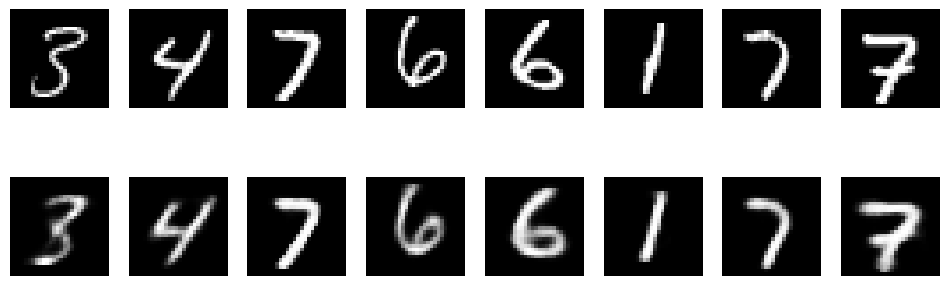

In [ ]:
model.eval()
x, _ = next(iter(train_loader))
x = x.to(DEVICE)

with torch.no_grad():
    x_hat, _, _ = model(x)

n = 8
plt.figure(figsize=(12, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x[i].cpu().squeeze(), cmap="gray")
    plt.axis("off")

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_hat[i].cpu().squeeze(), cmap="gray")
    plt.axis("off")

plt.show()

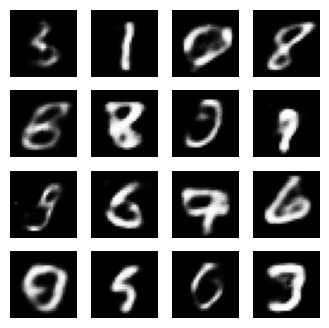

In [ ]:
with torch.no_grad():
    z = torch.randn(16, LATENT_DIM).to(DEVICE)
    samples = model.decoder(z)

plt.figure(figsize=(4,4))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(samples[i].cpu().squeeze(), cmap="gray")
    plt.axis("off")

plt.show()


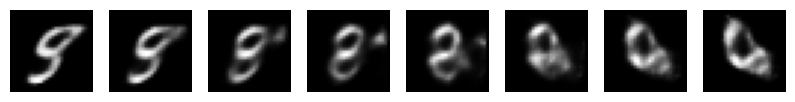

In [ ]:
model.eval()
z = torch.zeros(1, LATENT_DIM).to(DEVICE)

plt.figure(figsize=(10, 4))
for i, val in enumerate(torch.linspace(-3, 3, 8)):
    z[0, 5] = val
    with torch.no_grad():
        img = model.decoder(z)
    plt.subplot(1, 8, i + 1)
    plt.imshow(img.cpu().squeeze(), cmap="gray")
    plt.axis("off")

plt.show()